# Chapter 8: Dynamic Programming

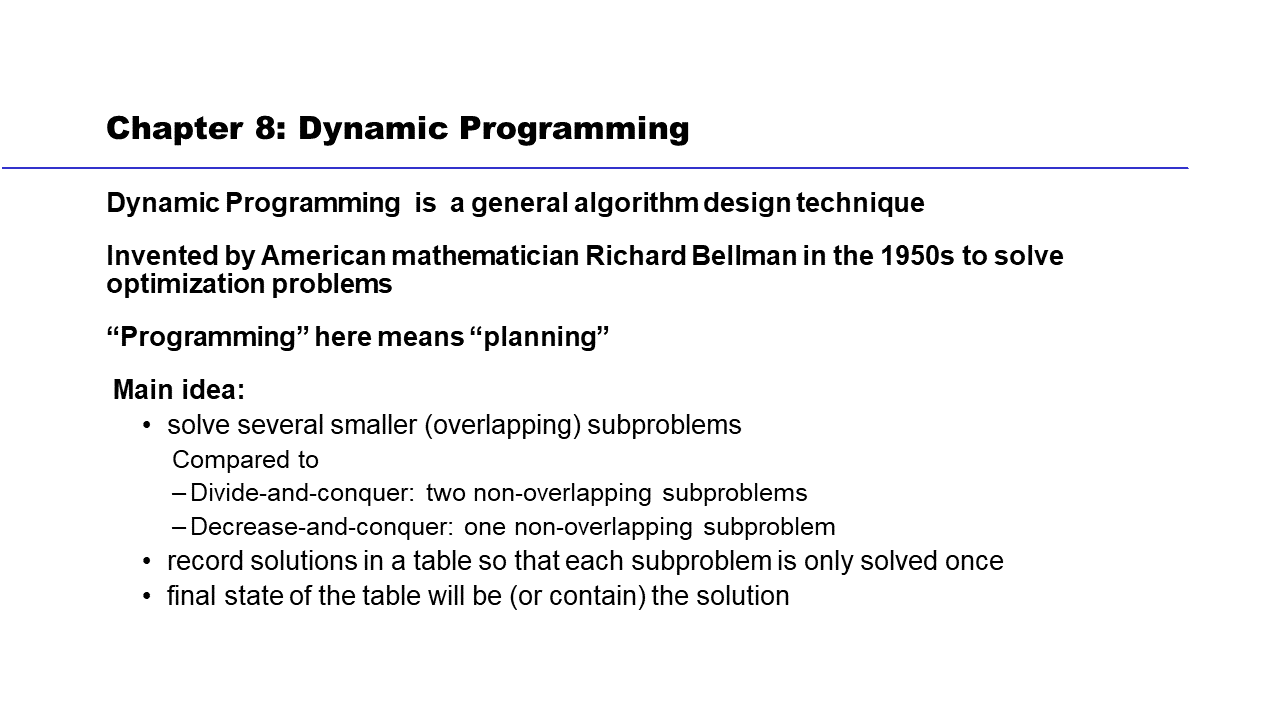

## Fibonacci Numbers
$fib(0) = 1$

$fib(1) = 1$

$fib(n) = fib(n-1) + fib(n-2)$ , $n>1$

In [58]:
#imports
import numpy as np
from graphviz import Digraph
from graphviz import Graph
import random
from IPython.display import Image
from IPython.core.display import display, HTML

In [59]:
class fib_tree:
    def __init__(self, n):
        self.n = n
        self.left = None
        self.right = None
        if n > 1:
            l = fib_tree(n-1)
            r = fib_tree(n-2)
            self.left  = l
            self.right = r
            
def label_fib_tree(t, i=0):
    t.i = i
    i += 1
    if t.left is not None:
        i = label_fib_tree(t.left,i)
    if t.right is not None:
        i = label_fib_tree(t.right,i)

    return i

def draw_fib_tree(n):
    fibt = fib_tree(n)
    label_fib_tree(fibt)
    dot = Digraph('FibDrawing')
   
    
    def dft(ft,parent=None):
        if ft is None:
            return None
        value = 0 #handles one base case
        if ft.n == 1:
            value = 1
        elif ft.n>1:
            value = ft.left.n + ft.right.n
        dot.node(str(ft.i),label = 'fib('+str(ft.n)+')='+str(value) )
        
        if parent is not None:
            dot.edge(str(parent.i),str(ft.i))
        
        dft(ft.left, parent = ft)
        dft(ft.right, parent = ft)
               
            
    dft(fibt)
    display(dot)

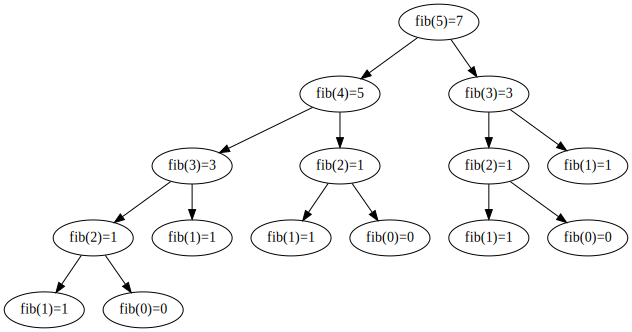

In [60]:
draw_fib_tree(5)

## Observations?
- Notice we calculate the *same* fibonacci number *many* times. 
- These can be called **overlapping subproblems**. This is one property of problems amenable to Dynamic Programming.

You may be aware of other approaches (iterative where you work "bottom-up" from $fib(2),fib(3),\dots n$ ). The recursive method will be referred to as "top-down recursive". This is even space-efficient since we only need the last two solutions to calculate the next Fibonacci number.

 

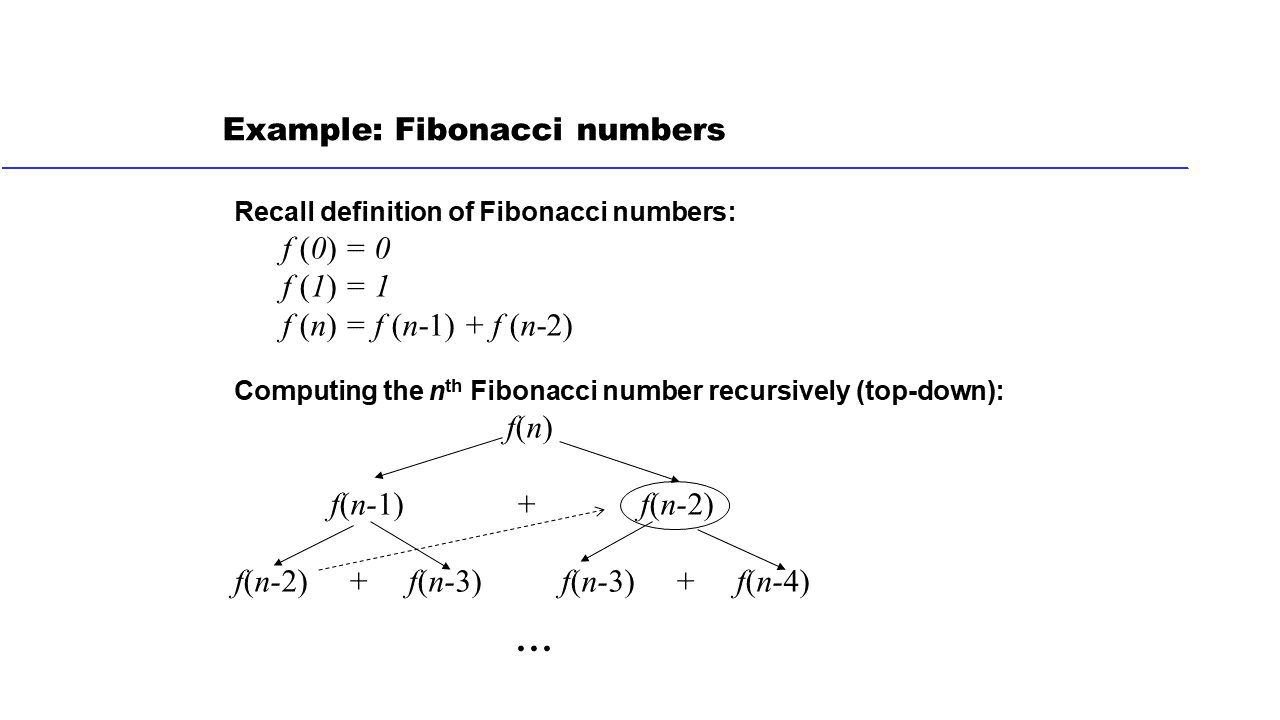

... but let's look at building a table to solve that.

In [61]:
def fib_n_table(n):
    if n == 0 or n== 1:
        return 1
    table = [1,1]
    for i in range(2,n+1): # second is exclusive
        table.append(table[-1]+table[-2]) # last two items -- negative numbers are from the end
    return table[-1]

In [62]:
for i in range(0,10):
    print(fib_n_table(i))

1
1
2
3
5
8
13
21
34
55


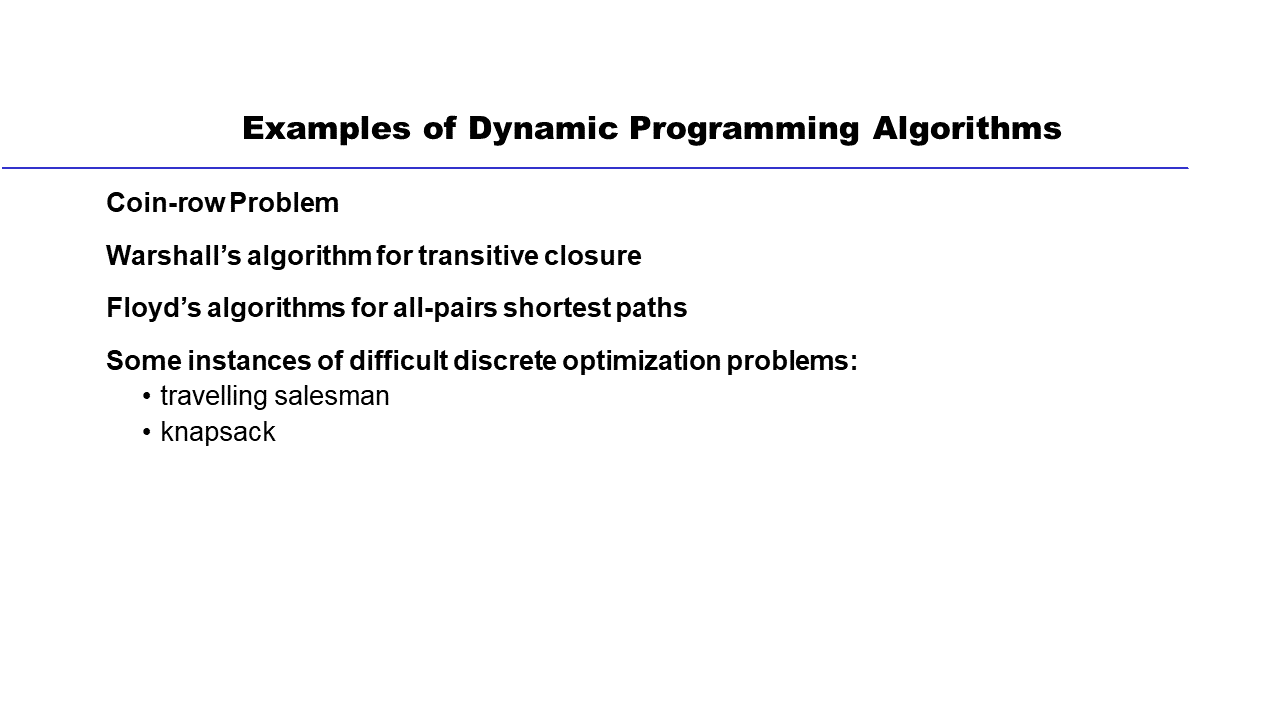

## Coin-Row

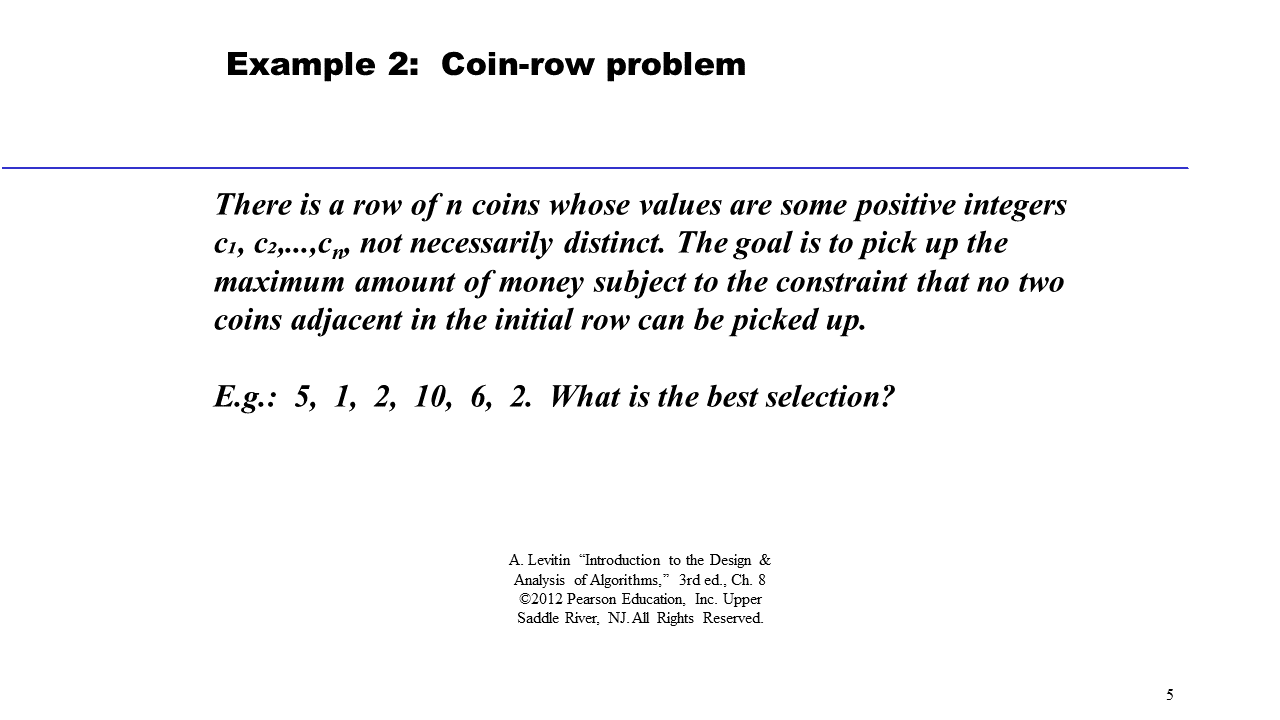

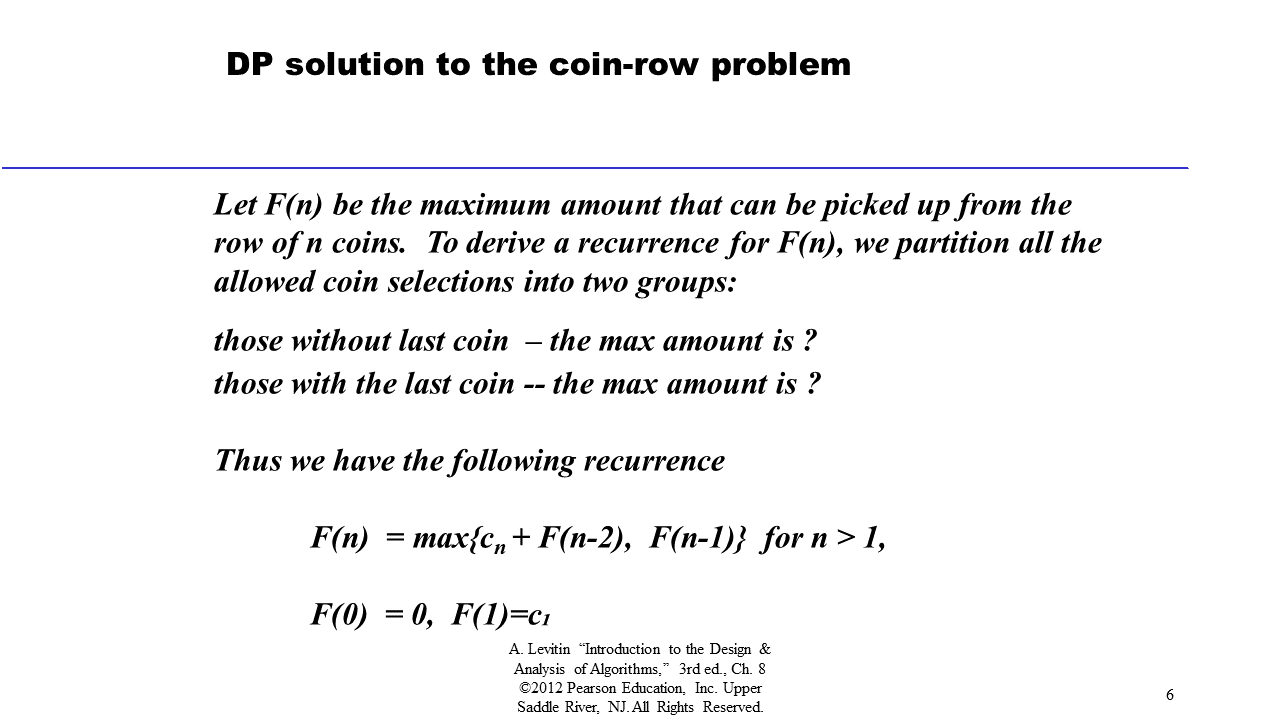

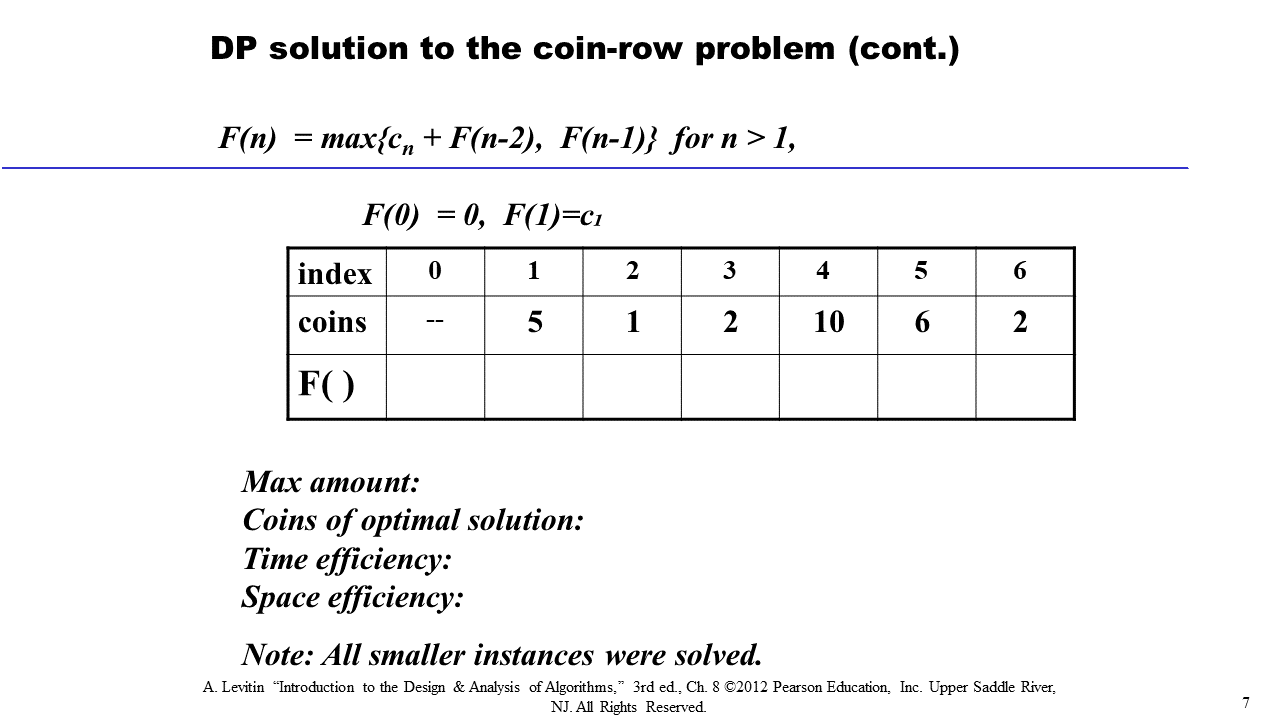

Let's code this.

In [63]:
def coin_row(coins):
    indices = [0,1]
    coins = ['-'] + coins # shifting coins
    F     = [0,coins[1]]
    for i in range(2,len(coins)):
        indices.append(i)
        F.append( max( F[i-1], coins[i] + F[i-2])) 
    
    indices = ['index']+indices
    coins = ['coins']+coins
    F = ['F()'] + F
    display_as_table([indices,coins, F])
    
    
    
    
def display_as_table( lists ):
    tbl = '''<table>'''
    for xs in lists:
        tbl += "<tr>"
        for x in xs:
            tbl += "<td>" + str(x) + "</td>"
        tbl += "</tr>"
    tbl += '''</table>'''
    
    display(HTML(tbl))
        
coin_row([5,1,2,10,6,2])

index,0,1,2,3,4,5,6
coins,-,5,1,2,10,6,2
F(),0,5,5,7,15,15,17


Okay, the right-most value in F tells you the maximal *value* but not the *optimal solution*. How do we get that. I often refer to this as decoding the solution (but "reconstructing" is I think more normal). The solution can be found using the table (whether you refer to it as decoding or reconstructing). One strategy is to just remember your choices.

In [64]:
def coin_row(coins):
    indices = [0,1]
    coins = ['-'] + coins # shifting coins
    F     = [0,coins[1]]
    choices = ['skip','keep']        ######################### NEW
    for i in range(2,len(coins)):
        indices.append(i)
        
        skip = F[i-1]
        keep = coins[i] + F[i-2]
        if skip > keep:
            choices.append('skip')
        else:
            choices.append('keep')
        F.append( max( skip, keep ) )
    
    indices = ['index']+indices
    coins = ['coins']+coins
    F = ['F()'] + F
    choices = ['choice']+choices
    display_as_table([indices,coins, F,choices])
    
    (sol,sindices) = reconstruct(coins,choices,F[-1])
    sol = ['coins']+sol
    sindices = ['index']+sindices
    display_as_table([sol,sindices])
    
    
    
def reconstruct(coins, choices, test=None):
    i = len(coins) -1
    solution = []
    sol_indices = []
    while(i>0): #first one is not a 'real' choice
        if choices[i] == 'keep':
            solution.append(coins[i])
            sol_indices.append(i-1)
            i-=2
        else:
            i-=1
    if test is not None:
        if test == sum(solution) :
            print ('test passed!')
        else:
            print('test FAILED')
    solution.reverse()
    sol_indices.reverse()
    return (solution,sol_indices)
        
    
    
def display_as_table( lists ):
    tbl = '''<table>'''
    for xs in lists:
        tbl += "<tr>"
        for x in xs:
            tbl += "<td>" + str(x) + "</td>"
        tbl += "</tr>"
    tbl += '''</table>'''
    
    display(HTML(tbl))
        
coin_row([5,1,2,10,6,2])

index,0,1,2,3,4,5,6
coins,-,5,1,2,10,6,2
F(),0,5,5,7,15,15,17
choice,skip,keep,skip,keep,keep,skip,keep


test passed!


coins,5,10,2
index,1,4,6


In [65]:
coin_row([1,5,2,10,6,2]) #flip first 2

index,0,1,2,3,4,5,6
coins,-,1,5,2,10,6,2
F(),0,1,5,5,15,15,17
choice,skip,keep,keep,skip,keep,skip,keep


test passed!


coins,5,10,2
index,2,4,6


You don't have to necessarily remember each choice -- you can just work from the optimal value and work backwards.
- Just use the function to figure out the choice you made at each step
- Some students find this easier 
    - Con: harder to visualize.
    - Pro: Do not have to manage another table/row

## Optimal Substructure
Dynamic Programming Problems (and Greedy Algorithms...) have subproblems where *the solution to each subproblem* can be used to solve the original problem. *Overlapping Subproblems* allows us to avoid repeated work. *Optimal Substructure* allows our solution to be optimal.

Examples:
- In Coin Row

## Longest Common Subsequence (LCS)
Problem is to find the *longest common subsequence* of two input strings (sequences), which is the longest string that has
- each of its characters matches an instance of a charater in *each of the input strings* in the *same order* as they occur in *each input string*
- This may involve *skipping* characters, going from low index to high index ("same direction")
- But, you may not *reverse* or *go backwards*/hop around, i.e. the relative, by index, order of the chatacters is the same.
- Example, generated from http://lcs-demo.sourceforge.net/
    - String 1: **C**AA**D**A**CD**
    - String 2: **CDC**C**D**CA           (Note: could be **CD**C**CD**CA) as well
    - LCS: CDCD
- Because the relative order of the characters in the input strings have to be preserved the subproblems (optimal substructure) corresponds to *prefixes* of the input strings. 

So we build a 2D table to store the *optimal solutions* to *pairs of prefixes*
- The table stores the results 
- Will initialize with the "results" of LCS of empty sequences (empty string/sequence) 
- Each solution, a LCS(i,j) is
    - $1+LCS(i-1,j-1)$  if character $i$ the first string is the same as character $j$ in the second 
    - otherwise, $max\{LCS(i-1,j),LCS(i,j-1)\}$, where 
        - $LCS(i-1,j)$  "means" *skipping* a character of the first string
        - $LCS(i,j-1)$  "means" *skipping* a character of the second string

Aside: There is a related idea -- **memoization** where it's not a table but something like a hash table or some other *map*/*dictionary* type structure
- the *keys* are the parameters of the subproblems and the *values* are the results
- useful if not every subproblem needs to be considered

In [66]:
def lcs(s1,s2):
    table = []
    table.append( [(0,'left') for i in range(len(s1)+1)] )
    for i in range(len(s2)): # first row alread filled
        table.append([(0,'up')])
    nrows = len(s2)+1
    ncols = len(s1)+1
    for row in range(1,nrows):
        for col in range(1,ncols):
            if s1[col-1] == s2[row-1]:
                 table[row].append( (1 + table[row-1][col-1][0], 'skip') )
            elif table[row][col-1][0] >= table[row-1][col][0]: #skip s1 char 
                table[row].append( (table[row][col-1][0], 'left') )
            else:
                table[row].append( (table[row-1][col][0], 'up') )
                
    return table

def print_table(table,s1,s2):
    table =  table.copy() #shallow copy okay here
    for r in range(len(table)):
        for c in range(len(table[r])):
            (v,d) = table[r][c]
            if d=='up':
                d='^'
                #d='\u2b61'
            elif d=='left':
                d='<'
                #d='\u2b60'
            else:
                d="\\"
                #d='\u2b66'
            table[r][c] = d+str(v)
    
    row1 = [' ']+ [c for c in s1]
    table = [row1] + table
    s2 = [' ',' '] + [c for c in s2]
    print(len(table))
    print(len(s2))
    for i in range(len(table)):
        table[i] = [s2[i]]+ table[i]
    display_as_table(table)
            
        
s1 = 'CAADACD'
s2 = 'CDCCDCA'
print_table(lcs(s1,s2),s1,s2)


9
9


,,C,A,A,D,A,C,D
,<0,<0,<0,<0,<0,<0,<0,<0
C,^0,\1,<1,<1,<1,<1,\1,<1
D,^0,^1,<1,<1,\2,<2,<2,\2
C,^0,\1,<1,<1,^2,<2,\3,<3
C,^0,\1,<1,<1,^2,<2,\3,<3
D,^0,^1,<1,<1,\2,<2,^3,\4
C,^0,\1,<1,<1,^2,<2,\3,^4
A,^0,^1,\2,\2,<2,\3,<3,^4


['f', 'r', 'e', 'd']